# CHEOPS secondary eclipse modelling
## Case a: Mixed reflection and thermal emission

**Author:** Hannu Parviainen<br>
**Last edited:** 2.8.2021

While the TESS photometry coveres the whole KELT-1b phase, the CHEOPS photometry covers only the near vicinity of the secondary eclipse. This means that we can't estimate the ellipsoidal variations or Doppler boosting independently for the CHEOPS passband.

In [1]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from src import CHEOPSLPF

In [4]:
lpf = CHEOPSLPF('b')

In [6]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.162206963, σ = 0.0004135128768209216) [    -inf ..      inf],
   1 |G| p              N(μ = 1.2174942857343196, σ = 2.095648290727226e-07) [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5624578257015601, σ = 0.04022094145421803) [    0.00 ..      inf],
   3 |G| b              N(μ = 0.3464268208117651, σ = 0.07451144684074082) [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.0058303791628832044, σ = 6.635051878834574e-05) [    0.00 ..      inf],
   7 |G| oev            N(μ = -4.0446508897614215e-08, σ = 2.317742859042316e-06) [    -inf ..      inf],
   8 |G| aev_cheops     N(μ = 0.0005021031904972375, σ = 3.6299133593319146e-05) [    0.00 ..      inf],
   9 |G| adb_cheops     N(μ = 6.3e-05, σ = 6.4e-06)              [    0.00 ..      inf],
  10 |G| log10_ted_

## Find the global posterior mode

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

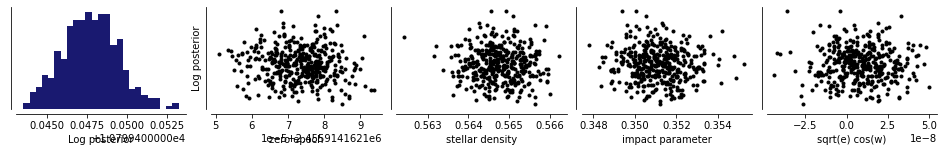

In [5]:
lpf.optimize_global(15000, npop=400)

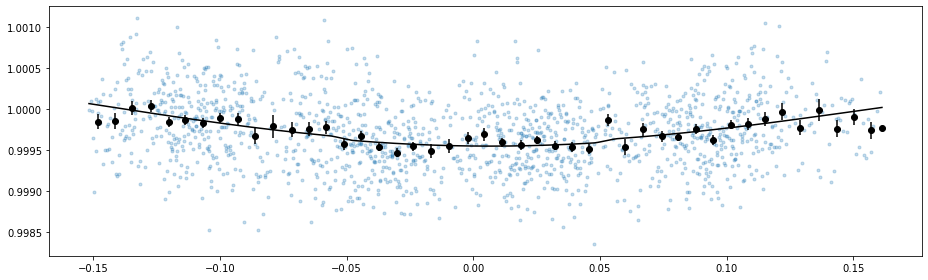

In [8]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [9]:
lpf.sample_mcmc(15000, 100, repeats=10, save=True)

MCMC sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Run 1/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 3/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 4/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 5/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 6/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 7/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 8/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 9/10:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 10/10:   0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
from src.kelt1 import bplot
df = lpf.posterior_samples(derived_parameters=False)

fig, ax = subplots(figsize=(13,6))
bplot(df.iloc[:,10:])
ax.set_ylim(-0.0003, 0.0003)
setp(ax, xlabel='PSF component')
fig.tight_layout()

---

<center>&copy;2022 Hannu Parviainen</center>